In [2]:
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

$\huge \text{Q1} \\ \text{Write code to read the dataset in Data Q1.txt into two numpy arrays: X and y containing
the features and labels respectively.}$

In [6]:
with open('Data_Q1.txt') as f:
    data_list = f.readlines()

In [7]:
labels=[]
features=[]

for line in data_list:
  line_list=line.split()
  labels.append(int(line_list[0]))
  for j in line_list[1:]:
    features.append(int(j.split(':')[0]))
    
features=np.array(features)
labels_arr=np.unique(np.array(labels))
features_arr=np.unique(features)
print(features_arr)
dict_count={}
for i in labels_arr:
  dict_count[i]=labels.count(i)
print(dict_count)  




[    1     2     3 ... 54875 54876 54877]
{-1: 1933, 1: 2210}


In [8]:
print('y Array: array of labels:\n')
print(labels_arr)
print('\n X array: array of features:\n')
print(features_arr)

y Array: array of labels:

[-1  1]

 X array: array of features:

[    1     2     3 ... 54875 54876 54877]


$\huge \text{Q2} \\ \text{Print the number of classes in the data set and the number of samples belonging to
each class. Indicate if there is class imbalance issue.}$

In [6]:
print('Number of classes in dataset:',len(labels_arr),'\n')
print('Number of features in dataset:',len(features_arr),'\n')
print('Number of samples belonging to class ',labels_arr[0],'is :',dict_count[labels_arr[0]],'\n')
print('Number of samples belonging to class ',labels_arr[1],'is :',dict_count[labels_arr[1]],'\n')



Number of classes in dataset: 2 

Number of features in dataset: 54877 

Number of samples belonging to class  -1 is : 1933 

Number of samples belonging to class  1 is : 2210 



In [7]:
df=pd.DataFrame(labels,columns=['x'])

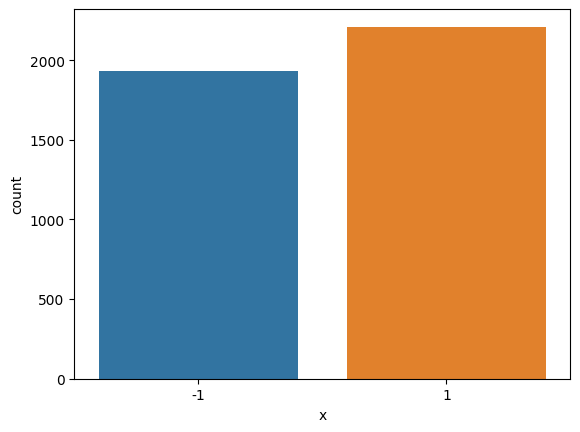

In [8]:
ax=sns.countplot(x='x',data=df)


In [13]:
print('Proportion of class 1 in data:',dict_count[labels_arr[1]]/(dict_count[labels_arr[1]]+dict_count[labels_arr[0]]),'%')

Proportion of class 1 in data: 0.5334298817282163 %


In [12]:
print('Proportion of class -1 in data:',dict_count[labels_arr[0]]/(dict_count[labels_arr[1]]+dict_count[labels_arr[0]]),'%')

Proportion of class -1 in data: 0.46657011827178374 %


$\text{As we can see that proportion of class 1 and -1 in data is lying in interval } [40,60] \text{So our data is in balanced mode.}$

$\large \text{Here we can see that Classes balance.}$

In [14]:
df=pd.DataFrame(columns=['label']+list(features_arr))

df

,label,1,2,3,4,5,6,7,8,9,...,54868,54869,54870,54871,54872,54873,54874,54875,54876,54877


In [15]:
# number of data points
n=len(data_list)
print('number of data points:',n)

number of data points: 4143


In [16]:
#number of features
d=len(features_arr)
print('number of features:',d)

number of features: 54877


In [17]:
array=np.array([0 for i in range(n*(d+1))]).reshape(n,(d+1))
array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:

for i in range(len(data_list)):
  line=data_list[i].split()
  array[i,0]=int(line[0])
  for j in line[1:]:
    a=j.split(':')
    array[i,int(a[0])]=int(a[1])
array   


array([[ 1,  1,  1, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  1,  1,  1],
       [ 1,  0,  0, ...,  0,  0,  0]])

In [19]:
df=pd.DataFrame(array,columns=['label']+list(features_arr))
data=df.copy()

In [20]:
#data

In [21]:
del array


$\huge \text{Q3.} \\ \text{Split the data into two sets such that 80% of the data is considered as set T1 and
20% of the data is considered as set T2. Justify if set T1 and} \\ \text{ set T2 have similar class label proportions.}$

In [22]:

data_X=data[data.columns[1:]]
data_Y=data['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=34)


In [24]:
print('training data points:',len(X_train),',test data points:',len(X_test))

training data points: 3314 ,test data points: 829


In [25]:
# Label proportion
label=list(Y_train)
proportion_1=label.count(1)/len(Y_train)
proportion_2=label.count(-1)/len(Y_train)
del label
print('proportion of label 1 in training data set:',proportion_1)
print('proportion of label -1 in training data set:',proportion_2)
label=list(Y_test)
proportion_1=label.count(1)/len(Y_test)
proportion_2=label.count(-1)/len(Y_test)
del label
print('proportion of label 1 in training data set:',proportion_1)
print('proportion of label -1 in training data set:',proportion_2)


proportion of label 1 in training data set: 0.5331925165962583
proportion of label -1 in training data set: 0.4668074834037417
proportion of label 1 in training data set: 0.53437876960193
proportion of label -1 in training data set: 0.46562123039806996


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


$\large \text{Parameter values:}$

In [ ]:
from timeit import default_timer as timer

In [ ]:
# Define a range of possible values for the hyperparameter C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

$\huge \text{Qd.} \\  \text{Using T1 as training data, train each of the following algorithms by tuning only the
hyperparameters specified below (keep all other} \\ \text{ hyperparameters fixed to the default values in
scikit-learn)} \\ \text{:
i. Logistic regression with L2 regularizer (Hyperparameter: regularization constant C)} \\ \text{
ii. Logistic regression with L1 regularizer (Hyperparameter: regularization constant C)} \\ \text{
iii. Soft-margin SVM with L2 regularizer (Hyperparameter: regularization constant C)} \\ \text{
iv. Soft-margin SVM with L1 regularizer (Hyperparameter: regularization constant C)} \\ \text{
v. Kernel SVM with RBF kernel (Hyperparameter: kernel parameter γ)} \\ \text{
vi. KNN (Hyperparameter: number of neighbors)} \\ \text{
vii. Decision tree (Hyperparameter: min weight fraction leaf)} \\ \text{
viii. Random forest (Hyperparameter: number of estimators)} \\ \text{
Choose appropriate ranges for the hyperparameters to be tuned. Clearly indicate the range you
choose and justify your choice for the range} \\ \text{ chosen. Tune the hyperparameters using 5-fold
cross-validation procedure.}$

$\huge \text{Logistic Regression with penalty L2}$

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

$\large \text{Reason for choosing these parameters:} \\ \text{ Since we want to see the penalty effect over the prediction so we want to take a broad range of penalty so we started from } 10^{-3} \text{and goes to} 10^4. \\  \text{So that we can find the best parameter. }$

In [ ]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start= timer()
lr = LogisticRegression(penalty='l2',max_iter=1000,solver='lbfgs')
grid_search = GridSearchCV(lr, param_grid,  cv=5,n_jobs=multiprocessing.cpu_count())
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_lr = LogisticRegression(penalty='l2',  C=best_C)
final_lr.fit(X_train, Y_train)

# for training data 

y_pred_train=final_lr.predict(X_train)
accuracy_lr_l2_train = accuracy_score(Y_train, y_pred_train)
precision_lr_l2_train=precision_score(Y_train,y_pred_train)
recall_lr_l2_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_lr_l2_train=tn/(tn+fp)
# sensitivity
sensitivity_lr_l2_train=tp/(tp+fn)
# print the all results

print('For Logistic regression using l2 penalty:\n')
print('for training data \n ******************************************')
print('Accuracy is:',accuracy_lr_l2_train)
print('Precision is:',precision_lr_l2_train)
print('Recall is:',recall_lr_l2_train)
print('specificity is :',specificity_lr_l2_train)
print('sensitivity is:',sensitivity_lr_l2_train)

# for test  data 
y_pred_test = final_lr.predict(X_test)
accuracy_lr_l2_test = accuracy_score(Y_test, y_pred_test)
precision_lr_l2_test=precision_score(Y_test,y_pred_test)
recall_lr_l2_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_lr_l2_test=tn/(tn+fp)
# sensitivity
sensitivity_lr_l2_test=tp/(tp+fn)
end=timer()
# print the all results
print('\n ****************************************\n for test data')
print('Accuracy is:',accuracy_lr_l2_test)
print('Precision is:',precision_lr_l2_test)
print('Recall is:',recall_lr_l2_test)
print('specificity is :',specificity_lr_l2_test)
print('sensitivity is:',sensitivity_lr_l2_test)
print('***********************************************************\n*********************************************')
print('Time taken :',end-start)





Best C: 1
For Logistic regression using l2 penalty:

for training data 
 ******************************************
Accuracy is: 0.9981894990947495
Precision is: 0.99830220713073
Recall is: 0.99830220713073
specificity is : 0.9980607627666451
sensitivity is: 0.99830220713073

 ****************************************
 for test data
Accuracy is: 0.8914354644149578
Precision is: 0.8812095032397408
Recall is: 0.9209932279909706
specificity is : 0.8575129533678757
sensitivity is: 0.9209932279909706
***********************************************************
*********************************************
Time taken : 307.73681197687984


$\huge \text{Logistic Regression with L1 Norm}$

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

$\large \text{Reason for choosing these parameters:} \\ \text{ Since we want to see the penalty effect over the prediction so we want to take a broad range of penalty so we started from } 10^{-3} \text{and goes to} 10^4. \\  \text{So that we can find the best parameter. }$

In [ ]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start=timer()
lr = LogisticRegression(penalty='l1', solver='liblinear')
grid_search = GridSearchCV(lr, param_grid,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_lr = LogisticRegression(penalty='l1', C=best_C,solver='liblinear')
final_lr.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred_test = final_lr.predict(X_test)

# for training data 

y_pred_train=final_lr.predict(X_train)
accuracy_lr_l1_train = accuracy_score(Y_train, y_pred_train)
precision_lr_l1_train=precision_score(Y_train,y_pred_train)
recall_lr_l1_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_lr_l1_train=tn/(tn+fp)
# sensitivity
sensitivity_lr_l1_train=tp/(tp+fn)
# print the all results
print('For Logistic regression using l1 penalty:\n')
print('for training data : \n ************************************')
print('Accuracy is:',accuracy_lr_l1_train)
print('Precision is:',precision_lr_l1_train)
print('Recall is:',recall_lr_l1_train)
print('specificity is :',specificity_lr_l1_train)
print('sensitivity is:',sensitivity_lr_l1_train)

# for test  data 
y_pred_test = final_lr.predict(X_test)
accuracy_lr_l1_test = accuracy_score(Y_test, y_pred_test)
precision_lr_l1_test=precision_score(Y_test,y_pred_test)
recall_lr_l1_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_lr_l1_test=tn/(tn+fp)
# sensitivity
sensitivity_lr_l1_test=tp/(tp+fn)
end=timer()
# print the all results
print('************************************************\n for test data:')
print('Accuracy is:',accuracy_lr_l1_test)
print('Precision is:',precision_lr_l1_test)
print('Recall is:',recall_lr_l1_test)
print('specificity is :',specificity_lr_l1_test)
print('sensitivity is:',sensitivity_lr_l1_test)
print('***********************************************************\n*********************************************')
print('time taken is:',end-start)







Best C: 1000
For Logistic regression using l1 penalty:

for training data : 
 ************************************
Accuracy is: 0.9993964996982498
Precision is: 0.9994340690435767
Recall is: 0.9994340690435767
specificity is : 0.9993535875888817
sensitivity is: 0.9994340690435767
************************************************
 for test data:
Accuracy is: 0.8841978287092883
Precision is: 0.8864142538975501
Recall is: 0.8984198645598194
specificity is : 0.8678756476683938
sensitivity is: 0.8984198645598194
***********************************************************
*********************************************
time taken is: 117.35022687539458


$\huge \text{Soft margin SVM with L2 norm:}$

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

$\large \text{Reason for choosing these parameters:} \\ \text{ Since we want to see the penalty effect over the prediction so we want to take a broad range of penalty so we started from } 10^{-3} \text{and goes to} 10^4. \\  \text{So that we can find the best parameter. }$

In [ ]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start=timer()
soft_svm = LinearSVC(penalty='l2')
grid_search = GridSearchCV(soft_svm, param_grid,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_soft_svm =  LinearSVC(penalty='l2',  C=best_C)
final_soft_svm.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred = final_soft_svm.predict(X_test)

# for training data 

y_pred_train=final_soft_svm.predict(X_train)
accuracy_soft_svm_l2_train = accuracy_score(Y_train, y_pred_train)
precision_soft_svm_l2_train=precision_score(Y_train,y_pred_train)
recall_soft_svm_l2_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_soft_svm_l2_train=tn/(tn+fp)
# sensitivity
sensitivity_soft_svm_l2_train=tp/(tp+fn)
# print the all results
print('For soft svm  using l2 penalty:\n')
print('for training data : \n ************************************')
print('Accuracy is:',accuracy_soft_svm_l2_train)
print('Precision is:',precision_soft_svm_l2_train)
print('Recall is:',recall_soft_svm_l2_train)
print('specificity is :',specificity_soft_svm_l2_train)
print('sensitivity is:',sensitivity_soft_svm_l2_train)

# for test  data 
y_pred_test = final_soft_svm.predict(X_test)
accuracy_soft_svm_l2_test = accuracy_score(Y_test, y_pred_test)
precision_soft_svm_l2_test=precision_score(Y_test,y_pred_test)
recall_soft_svm_l2_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_soft_svm_l2_test=tn/(tn+fp)
# sensitivity
sensitivity_soft_svm_l2_test=tp/(tp+fn)
end=timer()
# print the all results
print('************************************************\n for test data:')
print('Accuracy is:',accuracy_soft_svm_l2_test)
print('Precision is:',precision_soft_svm_l2_test)
print('Recall is:',recall_soft_svm_l2_test)
print('specificity is :',specificity_soft_svm_l2_test)
print('sensitivity is:',sensitivity_soft_svm_l2_test)
print('***********************************************************\n*********************************************')
print('time taken is:',end-start)











/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

Best C: 0.01
For soft svm  using l2 penalty:

for training data : 
 ************************************
Accuracy is: 0.9903439951719976
Precision is: 0.9887323943661972
Recall is: 0.9932088285229203
specificity is : 0.9870717517776342
sensitivity is: 0.9932088285229203
************************************************
 for test data:
Accuracy is: 0.8902291917973462
Precision is: 0.8713080168776371
Recall is: 0.9322799097065463
specificity is : 0.8419689119170984
sensitivity is: 0.9322799097065463
***********************************************************
*********************************************
time taken is: 131.24741720035672


$\huge \text{Soft Margin SVM With L1 Norm:}$

$\large  \text{we set dual=False in this example because we are using L1 regularization with scikit-learn's LinearSVC function,} \\ \large \text{ and the dual algorithm is not supported with L1 regularization}$

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

$\large \text{Reason for choosing these parameters:} \\ \text{ Since we want to see the penalty effect over the prediction so we want to take a broad range of penalty so we started from } 10^{-3} \text{and goes to} 10^4. \\  \text{So that we can find the best parameter. }$

In [ ]:
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
start=timer()
soft_svm = LinearSVC(penalty='l1',dual=False )
grid_search = GridSearchCV(soft_svm, param_grid,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set
best_C = grid_search.best_params_['C']
print(f"Best C: {best_C}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_soft_svm = LinearSVC(penalty='l1',dual=False ,  C=best_C)
final_soft_svm.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred = final_soft_svm.predict(X_test)


# for training data 

y_pred_train=final_soft_svm.predict(X_train)
accuracy_soft_svm_l1_train = accuracy_score(Y_train, y_pred_train)
precision_soft_svm_l1_train=precision_score(Y_train,y_pred_train)
recall_soft_svm_l1_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_soft_svm_l1_train=tn/(tn+fp)
# sensitivity
sensitivity_soft_svm_l1_train=tp/(tp+fn)
# print the all results
print('For soft svm  using l1 penalty:\n')
print('for training data : \n ************************************')
print('Accuracy is:',accuracy_soft_svm_l1_train)
print('Precision is:',precision_soft_svm_l1_train)
print('Recall is:',recall_soft_svm_l1_train)
print('specificity is :',specificity_soft_svm_l1_train)
print('sensitivity is:',sensitivity_soft_svm_l1_train)

# for test  data 
y_pred_test = final_soft_svm.predict(X_test)
accuracy_soft_svm_l1_test = accuracy_score(Y_test, y_pred_test)
precision_soft_svm_l1_test=precision_score(Y_test,y_pred_test)
recall_soft_svm_l1_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_soft_svm_l1_test=tn/(tn+fp)
# sensitivity
sensitivity_soft_svm_l1_test=tp/(tp+fn)
end=timer()
# print the all results
print('************************************************\n for test data:')
print('Accuracy is:',accuracy_soft_svm_l1_test)
print('Precision is:',precision_soft_svm_l1_test)
print('Recall is:',recall_soft_svm_l1_test)
print('specificity is :',specificity_soft_svm_l1_test)
print('sensitivity is:',sensitivity_soft_svm_l1_test)
print('***********************************************************\n*********************************************')
print('time taken is:',end-start)






/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear fail

Best C: 100


/home/22n0451/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For soft svm  using l1 penalty:

for training data : 
 ************************************
Accuracy is: 0.9993964996982498
Precision is: 0.9994340690435767
Recall is: 0.9994340690435767
specificity is : 0.9993535875888817
sensitivity is: 0.9994340690435767
************************************************
 for test data:
Accuracy is: 0.8890229191797346
Precision is: 0.89086859688196
Recall is: 0.9029345372460497
specificity is : 0.8730569948186528
sensitivity is: 0.9029345372460497
***********************************************************
*********************************************
time taken is: 156.817613132298


$\huge \text{Kernel SVM with Kernel RBF:}$

In [ ]:
import multiprocessing as multiprocessing

$\large \text{Reason for choosing parameters:} \\ \text{Our chose gamma parameters:param_grid =} [ 0.0001,0.001,0.01,0.1,1,10,100] \\ \text{Reason: we know that  gamma paramter decides the decision boundary of classifier if it is small then decision boundary is smooth and if it is large} \\ \text{ then decision boundary is complex which may lead to overfitting. So we here chosen more small values than large values }$

In [ ]:
# Gamma values
start=timer()
param_grid = { 'gamma': [ 0.0001,0.001,0.01,0.1,1,10,100]}
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
kernel_SVM = SVC(kernel='rbf')
grid_search = GridSearchCV(kernel_SVM, param_grid,  cv=5,n_jobs=multiprocessing.cpu_count())
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set

best_gamma=grid_search.best_params_['gamma']
print(f"Best_gamma:{best_gamma}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_kernel_SVM = SVC(kernel='rbf',gamma=best_gamma)
final_kernel_SVM.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data

y_pred_train=final_kernel_SVM.predict(X_train)
accuracy_kernel_SVM_train = accuracy_score(Y_train, y_pred_train)
precision_kernel_SVM_train=precision_score(Y_train,y_pred_train)
recall_kernel_SVM_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_kernel_SVM_train=tn/(tn+fp)
# sensitivity
sensitivity_kernel_SVM_train=tp/(tp+fn)
# print the all results
print('For kernel_SVM with rbf kernel penalty:\n')
print('for training data : \n ************************************')
print('Accuracy is:',accuracy_kernel_SVM_train)
print('Precision is:',precision_kernel_SVM_train)
print('Recall is:',recall_kernel_SVM_train)
print('specificity is :',specificity_kernel_SVM_train)
print('sensitivity is:',sensitivity_kernel_SVM_train)

# for test  data 
y_pred_test = final_kernel_SVM.predict(X_test)
accuracy_kernel_SVM_test = accuracy_score(Y_test, y_pred_test)
precision_kernel_SVM_test=precision_score(Y_test,y_pred_test)
recall_kernel_SVM_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_kernel_SVM_test=tn/(tn+fp)
# sensitivity
sensitivity_kernel_SVM_test=tp/(tp+fn)
end=timer()
# print the all results
print('************************************************\n for test data:')
print('Accuracy is:',accuracy_kernel_SVM_test)
print('Precision is:',precision_kernel_SVM_test)
print('Recall is:',recall_kernel_SVM_test)
print('specificity is :',specificity_kernel_SVM_test)
print('sensitivity is:',sensitivity_kernel_SVM_test)
print('***********************************************************\n*********************************************')
print('time taken is:',end-start)
















Best_gamma:0.01
For kernel_SVM with rbf kernel penalty:

for training data : 
 ************************************
Accuracy is: 0.9815932407966204
Precision is: 0.9728381374722838
Recall is: 0.9932088285229203
specificity is : 0.9683257918552036
sensitivity is: 0.9932088285229203
************************************************
 for test data:
Accuracy is: 0.8661037394451147
Precision is: 0.8180076628352491
Recall is: 0.963882618510158
specificity is : 0.7538860103626943
sensitivity is: 0.963882618510158
***********************************************************
*********************************************
time taken is: 3158.902907986194


$\huge \text{K nearest Neighbours:} \\ \text{Chosen parameters:}[1,2,3,4,5........,15] \\ \text{Reason: Since we know that k nearest neighbours is a non parametrized method which is based on local density so as the value of k increases} \\ \text{ it's accuracy sometimes may increase but sometime may decrease it depends over data set but here size of data set is not so large so range of 1} \\ \text{ to 15 is good enough to predict.}$

In [ ]:
start=timer()
# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {'n_neighbors': range(1, 15)}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameter setting
print('best K value:',grid_search.best_params_['n_neighbors'])

best_K=grid_search.best_params_['n_neighbors']
# Train the final logistic regression model using the selected value of C and the entire training set
final_knn = KNeighborsClassifier(best_K)
final_knn.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for training data 

y_pred_train=final_knn.predict(X_train)
accuracy_knn_train = accuracy_score(Y_train, y_pred_train)
precision_knn_train=precision_score(Y_train,y_pred_train)
recall_knn_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_knn_train=tn/(tn+fp)
# sensitivity
sensitivity_knn_train=tp/(tp+fn)
# print the all results
print('For k nearest neighbours penalty:\n')
print('for training data : \n ************************************')
print('Accuracy is:',accuracy_knn_train)
print('Precision is:',precision_knn_train)
print('Recall is:',recall_knn_train)
print('specificity is :',specificity_knn_train)
print('sensitivity is:',sensitivity_knn_train)

# for test  data 
y_pred_test = final_knn.predict(X_test)
accuracy_knn_test = accuracy_score(Y_test, y_pred_test)
precision_knn_test=precision_score(Y_test,y_pred_test)
recall_knn_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_knn_test=tn/(tn+fp)
# sensitivity
sensitivity_knn_test=tp/(tp+fn)
end=timer()
# print the all results
print('************************************************\n for test data:')
print('Accuracy is:',accuracy_knn_test)
print('Precision is:',precision_knn_test)
print('Recall is:',recall_knn_test)
print('specificity is :',specificity_knn_test)
print('sensitivity is:',sensitivity_knn_test)
print('***********************************************************\n*********************************************')
print('time taken is:',end-start)










best K value: 1
For k nearest neighbours penalty:

for training data : 
 ************************************
Accuracy is: 0.9993964996982498
Precision is: 0.9994340690435767
Recall is: 0.9994340690435767
specificity is : 0.9993535875888817
sensitivity is: 0.9994340690435767
************************************************
 for test data:
Accuracy is: 0.7997587454764777
Precision is: 0.9261538461538461
Recall is: 0.6794582392776524
specificity is : 0.9378238341968912
sensitivity is: 0.6794582392776524
***********************************************************
*********************************************
time taken is: 293.7335535660386


$\huge \text{Decision Tree Classifier:} \\ \text{Chosen parameter (min weight fraction leaf)=}[0.0,0.01,0.1,0.25,0.5,0.75] \\ \text{min weight fraction leaf value x shows each leaf node must have at least x percent of the total weighted data. So we take  initially 0 which mean} \\ \text{ there is no limit over leaf for data but as we increase the parameter to see the the effect.}$

In [ ]:

start=timer()
# Define the KNN model
clf = DecisionTreeClassifier()
# Define the parameter grid to search over
param_grid = {'min_weight_fraction_leaf': [0.0,0.01,0.1,0.25,0.5,0.75]}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5,n_jobs=multiprocessing.cpu_count())

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameter setting
print('best min_weight_fraction_leaf:',grid_search.best_params_['min_weight_fraction_leaf'])

best_min_weight=grid_search.best_params_['min_weight_fraction_leaf']
# Train the final logistic regression model using the selected value of C and the entire training set
final_clf = DecisionTreeClassifier(min_weight_fraction_leaf=best_min_weight)
final_clf.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for training data 

y_pred_train=final_clf.predict(X_train)
accuracy_clf_train = accuracy_score(Y_train, y_pred_train)
precision_clf_train=precision_score(Y_train,y_pred_train)
recall_clf_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_clf_train=tn/(tn+fp)
# sensitivity
sensitivity_clf_train=tp/(tp+fn)
# print the all results
print('For Decision Tree Classifier:\n')
print('for training data : \n ************************************')
print('Accuracy is:',accuracy_clf_train)
print('Precision is:',precision_clf_train)
print('Recall is:',recall_clf_train)
print('specificity is :',specificity_clf_train)
print('sensitivity is:',sensitivity_clf_train)

# for test  data 
y_pred_test = final_clf.predict(X_test)
accuracy_clf_test = accuracy_score(Y_test, y_pred_test)
precision_clf_test=precision_score(Y_test,y_pred_test)
recall_clf_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_clf_test=tn/(tn+fp)
# sensitivity
sensitivity_clf_test=tp/(tp+fn)
end=timer()
# print the all results
print('************************************************\n for test data:')
print('Accuracy is:',accuracy_clf_test)
print('Precision is:',precision_clf_test)
print('Recall is:',recall_clf_test)
print('specificity is :',specificity_clf_test)
print('sensitivity is:',sensitivity_clf_test)
print('***********************************************************\n*********************************************')
print('time taken is:',end-start)










/home/22n0451/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/22n0451/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/22n0451/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/home/22n0451/.local/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/22n0451/.local/lib/python3.9/site-packa

best min_weight_fraction_leaf: 0.0
For Decision Tree Classifier:

for training data : 
 ************************************
Accuracy is: 0.9993964996982498
Precision is: 0.9994340690435767
Recall is: 0.9994340690435767
specificity is : 0.9993535875888817
sensitivity is: 0.9994340690435767
************************************************
 for test data:
Accuracy is: 0.8600723763570567
Precision is: 0.8531317494600432
Recall is: 0.891647855530474
specificity is : 0.8238341968911918
sensitivity is: 0.891647855530474
***********************************************************
*********************************************
time taken is: 33.02488311380148


$\huge  \text{Random Forest Classifier} \\ \text{As we want to choose the number of Trees whose low values may indicate underfitting and high values may indicate overfitting. }$ 

In [ ]:

start=timer()
# Define the KNN model
rd_forest=RandomForestClassifier()
# Define the parameter grid to search over
param_grid = {'n_estimators': [50,75,100,125,150,200,225]}

# Perform a grid search over the parameter grid using 5-fold cross-validation
grid_search = GridSearchCV(rd_forest, param_grid, cv=5,n_jobs=multiprocessing.cpu_count())

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameter setting
print('best n_estimators:',grid_search.best_params_['n_estimators'])

best_n_estimators=grid_search.best_params_['n_estimators']
# Train the final logistic regression model using the selected value of C and the entire training set
final_rd_forest =RandomForestClassifier(n_estimators=best_n_estimators)
final_rd_forest.fit(X_train, Y_train)

# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
# for training data 

y_pred_train=final_rd_forest.predict(X_train)
accuracy_rd_forest_train = accuracy_score(Y_train, y_pred_train)
precision_rd_forest_train=precision_score(Y_train,y_pred_train)
recall_rd_forest_train=recall_score(Y_train,y_pred_train)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_train, y_pred_train).ravel()
# specificity
specificity_rd_forest_train=tn/(tn+fp)
# sensitivity
sensitivity_rd_forest_train=tp/(tp+fn)
# print the all results
print('For Random forest classifier:\n')
print('for training data : \n ************************************')
print('Accuracy is:',accuracy_rd_forest_train)
print('Precision is:',precision_rd_forest_train)
print('Recall is:',recall_rd_forest_train)
print('specificity is :',specificity_rd_forest_train)
print('sensitivity is:',sensitivity_rd_forest_train)

# for test  data 
y_pred_test = final_rd_forest.predict(X_test)
accuracy_rd_forest_test = accuracy_score(Y_test, y_pred_test)
precision_rd_forest_test=precision_score(Y_test,y_pred_test)
recall_rd_forest_test=recall_score(Y_test,y_pred_test)
# finding confusion matrix
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_test).ravel()
# specificity
specificity_rd_forest_test=tn/(tn+fp)
# sensitivity
sensitivity_rd_forest_test=tp/(tp+fn)
end=timer()
# print the all results
print('************************************************\n for test data:')
print('Accuracy is:',accuracy_rd_forest_test)
print('Precision is:',precision_rd_forest_test)
print('Recall is:',recall_rd_forest_test)
print('specificity is :',specificity_rd_forest_test)
print('sensitivity is:',sensitivity_rd_forest_test)
print('***********************************************************\n*********************************************')
print('time taken is:',end-start)










best n_estimators: 150
For Random forest classifier:

for training data : 
 ************************************
Accuracy is: 0.9993964996982498
Precision is: 0.9994340690435767
Recall is: 0.9994340690435767
specificity is : 0.9993535875888817
sensitivity is: 0.9994340690435767
************************************************
 for test data:
Accuracy is: 0.8950542822677925
Precision is: 0.8617886178861789
Recall is: 0.9571106094808126
specificity is : 0.8238341968911918
sensitivity is: 0.9571106094808126
***********************************************************
*********************************************
time taken is: 109.03191603347659


$\huge \text{Que.E} \\  \text{Tabulate the accuracy, precision, recall, specificity and senstivity values for training
set T1 and test set T2 for each model trained in part (d) for} \\ \text{ the best hyperparameter choices.
Discuss your observations.}$

In [ ]:
headers=['Classifier name','Accuracy','Precision','Recall','Specificity','Sensitivity']
data=[['Logistic Regression with penalty L2',accuracy_lr_l2_train,precision_lr_l2_train,recall_lr_l2_train,specificity_lr_l2_train,sensitivity_lr_l2_train],['Logistic Regression with penalty L1',accuracy_lr_l1_train,precision_lr_l1_train,recall_lr_l1_train,specificity_lr_l1_train,sensitivity_lr_l1_train],['Soft margin SVM with L2 norm',accuracy_soft_svm_l2_train,precision_soft_svm_l2_train,recall_soft_svm_l2_train,specificity_soft_svm_l2_train,sensitivity_soft_svm_l2_train],['Soft margin SVM with L1 norm',accuracy_soft_svm_l1_train,precision_soft_svm_l1_train,recall_soft_svm_l1_train,specificity_soft_svm_l1_train,sensitivity_soft_svm_l1_train],['Kernel SVM with Kernel RBF',accuracy_kernel_SVM_train,precision_kernel_SVM_train,recall_kernel_SVM_train,specificity_kernel_SVM_train,sensitivity_kernel_SVM_train],['K nearest Neighbours',accuracy_knn_train,precision_knn_train,recall_knn_train,specificity_knn_train,sensitivity_knn_train],['Decision Tree Classifier',accuracy_clf_train,precision_clf_train,recall_clf_train,specificity_clf_train,sensitivity_clf_train],['Random forest classifier',accuracy_rd_forest_train,precision_rd_forest_train,recall_rd_forest_train,specificity_rd_forest_train,sensitivity_rd_forest_train]]


In [ ]:
table_train=pd.DataFrame(data,columns=headers)

In [ ]:
table_train

,Classifier name,Accuracy,Precision,Recall,Specificity,Sensitivity
0,Logistic Regression with penalty L2,0.998189,0.998302,0.998302,0.998061,0.998302
1,Logistic Regression with penalty L1,0.999396,0.999434,0.999434,0.999354,0.999434
2,Soft margin SVM with L2 norm,0.990344,0.988732,0.993209,0.987072,0.993209
3,Soft margin SVM with L1 norm,0.999396,0.999434,0.999434,0.999354,0.999434
4,Kernel SVM with Kernel RBF,0.981593,0.972838,0.993209,0.968326,0.993209
5,K nearest Neighbours,0.999396,0.999434,0.999434,0.999354,0.999434
6,Decision Tree Classifier,0.999396,0.999434,0.999434,0.999354,0.999434
7,Random forest classifier,0.999396,0.999434,0.999434,0.999354,0.999434


In [ ]:
headers=['Classifier name','Accuracy','Precision','Recall','Specificity','Sensitivity']
data_test=[['Logistic Regression with penalty L2',accuracy_lr_l2_test,precision_lr_l2_test,recall_lr_l2_test,specificity_lr_l2_test,sensitivity_lr_l2_test],['Logistic Regression with penalty L1',accuracy_lr_l1_test,precision_lr_l1_test,recall_lr_l1_test,specificity_lr_l1_test,sensitivity_lr_l1_test],['Soft margin SVM with L2 norm',accuracy_soft_svm_l2_test,precision_soft_svm_l2_test,recall_soft_svm_l2_test,specificity_soft_svm_l2_test,sensitivity_soft_svm_l2_test],['Soft margin SVM with L1 norm',accuracy_soft_svm_l1_test,precision_soft_svm_l1_test,recall_soft_svm_l1_test,specificity_soft_svm_l1_test,sensitivity_soft_svm_l1_test],['Kernel SVM with Kernel RBF',accuracy_kernel_SVM_test,precision_kernel_SVM_test,recall_kernel_SVM_test,specificity_kernel_SVM_test,sensitivity_kernel_SVM_test],['K nearest Neighbours',accuracy_knn_test,precision_knn_test,recall_knn_test,specificity_knn_test,sensitivity_knn_test],['Decision Tree Classifier',accuracy_clf_test,precision_clf_test,recall_clf_test,specificity_clf_test,sensitivity_clf_test],['Random forest classifier',accuracy_rd_forest_test,precision_rd_forest_test,recall_rd_forest_test,specificity_rd_forest_test,sensitivity_rd_forest_test]]
table_test=pd.DataFrame(data_test,columns=headers)

In [ ]:
table_test

,Classifier name,Accuracy,Precision,Recall,Specificity,Sensitivity
0,Logistic Regression with penalty L2,0.891435,0.881210,0.920993,0.857513,0.920993
1,Logistic Regression with penalty L1,0.884198,0.886414,0.898420,0.867876,0.898420
2,Soft margin SVM with L2 norm,0.890229,0.871308,0.932280,0.841969,0.932280
3,Soft margin SVM with L1 norm,0.889023,0.890869,0.902935,0.873057,0.902935
4,Kernel SVM with Kernel RBF,0.866104,0.818008,0.963883,0.753886,0.963883
5,K nearest Neighbours,0.799759,0.926154,0.679458,0.937824,0.679458
6,Decision Tree Classifier,0.860072,0.853132,0.891648,0.823834,0.891648
7,Random forest classifier,0.895054,0.861789,0.957111,0.823834,0.957111


$\huge \text{Results for training data for various methods:}$

|index|Classifier name|Accuracy|Precision|Recall|Specificity|Sensitivity|
|---|---|---|---|---|---|---|
|0|Logistic Regression with penalty L2|0\.998189|0\.998302|0\.998302|0\.998061|0\.998302|
|1|Logistic Regression with penalty L1|0\.999396|0\.999434|0\.999434|0\.999354|0\.999434|
|2|Soft margin SVM with L2 norm|0\.990344|0\.988732|0\.993209|0\.987072|0\.993209|
|3|Soft margin SVM with L1 norm|0\.999396|0\.999434|0\.999434|0\.999354|0\.999434|
|4|Kernel SVM with Kernel RBF|0\.981593|0\.972838|0\.993209|0\.968326|0\.993209|
|5|K nearest Neighbours|0\.999396|0\.999434|0\.999434|0\.999354|0\.999434|
|6|Decision Tree Classifier|0\.999396|0\.999434|0\.999434|0\.999354|0\.999434|
|7|Random forest classifier|0\.999396|0\.999434|0\.999434|0\.999354|0\.999434|

$\large \text{Observations:} \\ \text{Here we can see that All the scores (accuracy, Precision, Recall, Specificity, Sensitivity, Sensitivity) are about to it's ideal values which } \\ \text{indicates that by cross validation we got an appropriate parameter which gives suitable results.}$

$\huge \text{Results for test data for various methods:}$

|index|Classifier name|Accuracy|Precision|Recall|Specificity|Sensitivity|
|---|---|---|---|---|---|---|
|0|Logistic Regression with penalty L2|0\.891435|0\.88121|0\.920993|0\.857513|0\.920993|
|1|Logistic Regression with penalty L1|0\.884198|0\.886414|0\.89842|0\.867876|0\.89842|
|2|Soft margin SVM with L2 norm|0\.890229|0\.871308|0\.93228|0\.841969|0\.93228|
|3|Soft margin SVM with L1 norm|0\.889023|0\.890869|0\.902935|0\.873057|0\.902935|
|4|Kernel SVM with Kernel RBF|0\.866104|0\.818008|0\.963883|0\.753886|0\.963883|
|5|K nearest Neighbours|0\.799759|0\.926154|0\.679458|0\.937824|0\.679458|
|6|Decision Tree Classifier|0\.860072|0\.853132|0\.891648|0\.823834|0\.891648|
|7|Random forest classifier|0\.895054|0\.861789|0\.957111|0\.823834|0\.957111|

$\large \text{Observation:} \\ \text{As we can see that Various methods are giving various reasons.} \\ \text{The best performing models in terms of sensitivity are the Soft margin SVM with L2 norm and the Random forest classifier, with accuracy scores} \\ \text{ of 0.93228 and 0.957111 respectively.} \\ \text{The K nearest Neighbours model has the highest score on the recall metric, which measures the ability of the model to identify all relevant instances.} \\ \text{The Kernel SVM with Kernel RBF has the lowest accuracy score of 0.866104, indicating that this model may not be the best fit for the dataset.}$

$\huge \text{Q.F} \\ \text{Discuss if the L1 regularizers used in logistic regression and soft-margin SVM resulted
in sparse models when compared to L2 regularizers.} \\ \text{ Also compare and contrast the performance
of the models obtained using L1 and L2 regularizers. Using these observations, what
would you} \\ \text{ suggest to the practitioner regarding the use of L1 regularizer?}$

$\large \text{For Logistic Regression:} \\ \text{L1 norm: As we can see that every score what we computed (accuracy, Precision, Recall, Specificity, Sensitivity, Sensitivity) is lower than} \\ \text{ scores obtained while using L2 norm in unseen data(test data). Which indicates that for our data set Logistic regression with L2 norm is} \\ \text{ working better than l1 norm. } \\ \large \text{For SVM :} \\ \text{As we can see that various types of results are behaving differently  like l1 norm is giving precision and specificity better than l2 penalty that} \\ \text{ is if we are interested in only correctly predicted data in all data then l1 norm  is better than l2 norm.} \\ \text{On the other hand SVM with l2 penalty is giving better recall and sensitivity than l1 penalty that means if we are interested in } \\ \text{the correctly predicted data points in all predicted data points in that class than l2 penalty is better than l1 norm. } \\ \text{As we can see that choosing l1 or l2 depends on the observers choice.}$

$\large \text{suggestion to the practitioner regarding the use of L1 regularizer :} \\ \text{For Logistic regression: In logistic regression using l1 at the place of l2 is not a good choice since we saw the all scores obtained by l1 } \\ \text{penalized score is less than l2 penalized scores.}$